In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from schedule_ddf import SchedDDF
from rubin_sim.utils import ddf_locations


In [2]:
locations = ddf_locations()
sdd = SchedDDF()

In [3]:
sdd.ddf_grid.dtype

dtype([('mjd', '<f8'), ('sun_alt', '<f8'), ('ELAISS1_airmass', '<f8'), ('ELAISS1_sky_g', '<f8'), ('ELAISS1_m5_g', '<f8'), ('XMM_LSS_airmass', '<f8'), ('XMM_LSS_sky_g', '<f8'), ('XMM_LSS_m5_g', '<f8'), ('ECDFS_airmass', '<f8'), ('ECDFS_sky_g', '<f8'), ('ECDFS_m5_g', '<f8'), ('COSMOS_airmass', '<f8'), ('COSMOS_sky_g', '<f8'), ('COSMOS_m5_g', '<f8'), ('EDFS_a_airmass', '<f8'), ('EDFS_a_sky_g', '<f8'), ('EDFS_a_m5_g', '<f8'), ('EDFS_b_airmass', '<f8'), ('EDFS_b_sky_g', '<f8'), ('EDFS_b_m5_g', '<f8')])

In [4]:
schedules = []
for name in list(locations.keys())[:-1]:
    schedules.append(sdd.best_night(name))

Academic license - for non-commercial use only - expires 2021-12-19
Using license file /Users/yoachim/Dropbox/Apps/Gurobi/gurobi.lic
Changed value of parameter TimeLimit to 200.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 10966 rows, 361602 columns and 1275769 nonzeros
Model fingerprint: 0xa6cc8aed
Model has 3654 quadratic objective terms
Model has 3654 quadratic constraints
Variable types: 0 continuous, 361602 integer (350640 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [1e+00, 4e+02]
  RHS range        [1e+00, 4e+02]
  QRHS range       [1e+00, 1e+00]
Presolve removed 7312 rows and 355572 columns
Presolve time: 0.54s
Presolved: 3654 rows, 6030 columns, 12059 nonzeros
Presolved model has 3653

 20288 13686  173.74414   31  490  192.00000  164.04414  14.6%   2.4  140s
 20727 13960  180.76914   36  437  192.00000  164.04414  14.6%   2.4  152s
 21158 14195  165.04414   25  557  192.00000  164.04414  14.6%   2.4  155s
 22788 15265  172.05486   37  428  192.00000  164.74414  14.2%   2.4  160s
 24531 16414  165.74414   31  491  192.00000  164.84414  14.1%   2.3  165s
 26248 17467  166.74414   29  511  192.00000  164.94414  14.1%   2.3  170s
 27918 18523  190.45778   41  378  192.00000  165.14414  14.0%   2.3  176s
 29570 19581  174.64414   35  447  192.00000  165.74414  13.7%   2.3  181s
 30829 20508  188.82142   42  365  192.00000  165.84414  13.6%   2.3  185s
 32246 21377  183.19443   49  299  192.00000  165.84414  13.6%   2.3  191s
 33495 22214  166.84414   26  543  192.00000  165.94414  13.6%   2.3  196s
 34394 22729  182.67856   45  338  192.00000  165.94414  13.6%   2.3  200s

Explored 34804 nodes (85726 simplex iterations) in 200.64 seconds
Thread count was 4 (of 4 availabl

 11677  8022  241.50516   53  243  246.00000  210.08994  14.6%   2.6   65s
 12889  8667  225.64600   34  460  246.00000  210.54448  14.4%   2.6   76s
 13857  9534  229.82781   35  453  246.00000  210.86771  14.3%   2.5   80s
 15530 10711  239.44960   55  222  246.00000  211.14448  14.2%   2.5   85s
 17162 11828  239.69708   51  267  246.00000  211.54448  14.0%   2.4   90s
 18815 12917  235.64600   40  398  246.00000  212.08994  13.8%   2.4   95s
 20429 13954  241.63647   43  356  246.00000  212.54448  13.6%   2.4  100s
 20853 14252  223.82781   33  473  246.00000  212.54448  13.6%   2.4  109s
 21269 14505  239.63647   45  336  246.00000  212.67226  13.5%   2.4  110s
 22907 15571  225.82781   35  452  246.00000  213.01317  13.4%   2.3  115s
 25340 17135  218.14448   25  568  246.00000  213.34448  13.3%   2.3  120s
 26985 18181  243.94960   56  212  246.00000  213.54448  13.2%   2.3  126s
 28548 19224  229.26504   39  398  246.00000  213.85004  13.1%   2.3  130s
 30181 20269  226.93171  

In [5]:
name

'EDFS_a'

In [6]:
list(locations.keys())

['ELAISS1', 'XMM_LSS', 'ECDFS', 'COSMOS', 'EDFS_a', 'EDFS_b']

Text(0, 0.5, '5-sigma depth')

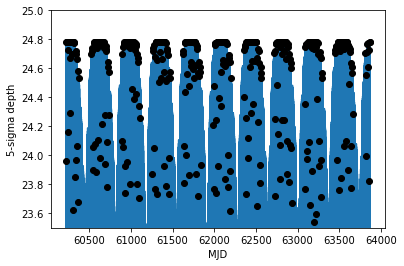

In [7]:
sched = schedules[-1]
plt.plot(sdd.ddf_grid['mjd'], sdd.ddf_grid['EDFS_a_m5_g'])
good = np.where(sched == 1)[0]
plt.plot(sdd.ddf_grid['mjd'][good], sdd.ddf_grid['EDFS_a_m5_g'][good], 'ko')
plt.ylim([23.5,25])
plt.xlabel('MJD')
plt.ylabel('5-sigma depth')

(61200.0, 61600.0)

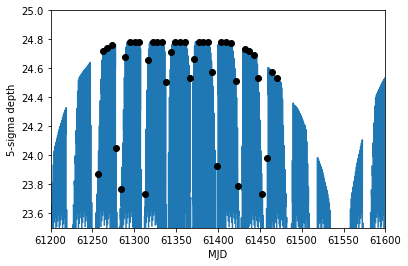

In [8]:
plt.plot(sdd.ddf_grid['mjd'], sdd.ddf_grid['EDFS_a_m5_g'])
good = np.where(sched == 1)[0]
plt.plot(sdd.ddf_grid['mjd'][good], sdd.ddf_grid['EDFS_a_m5_g'][good], 'ko')
plt.ylim([23.5,25])
plt.xlabel('MJD')
plt.ylabel('5-sigma depth')
plt.xlim([61200,61600])

(61250.0, 61350.0)

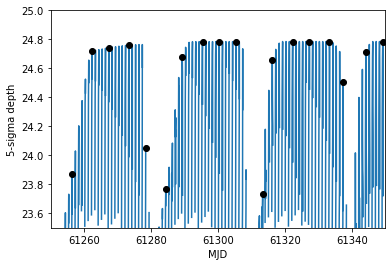

In [9]:
plt.plot(sdd.ddf_grid['mjd'], sdd.ddf_grid['EDFS_a_m5_g'])
good = np.where(sched == 1)[0]
plt.plot(sdd.ddf_grid['mjd'][good], sdd.ddf_grid['EDFS_a_m5_g'][good], 'ko')
plt.ylim([23.5,25])
plt.xlabel('MJD')
plt.ylabel('5-sigma depth')
plt.xlim([61250,61350])

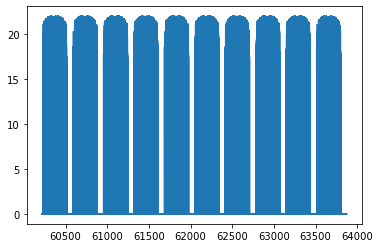

In [10]:
plt.plot(sdd.ddf_grid['mjd'], sdd.ddf_grid['COSMOS_sky_g'])
